In [1]:
import platform

print(f"Python version: {platform.python_version()}")
assert platform.python_version_tuple() >= ("3", "6")

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Setup plots
%matplotlib inline
plt.rcParams["figure.figsize"] = 10, 8
%config InlineBackend.figure_format = 'retina'
sns.set()

Python version: 3.8.5


# Kmeans

In [2]:
from pyfit.kmeans import KMeans

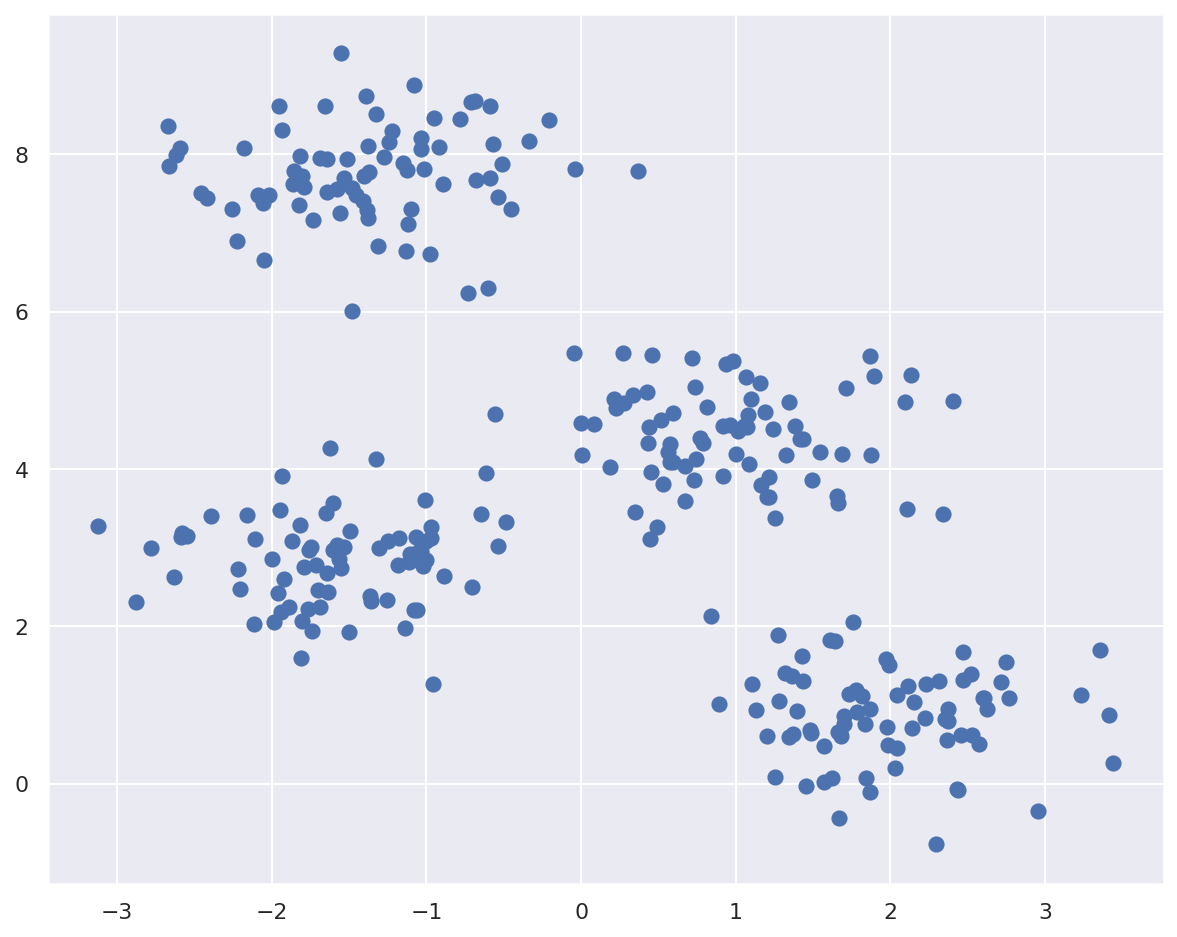

In [3]:
# dataset generation
from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)

nb iterations : 100


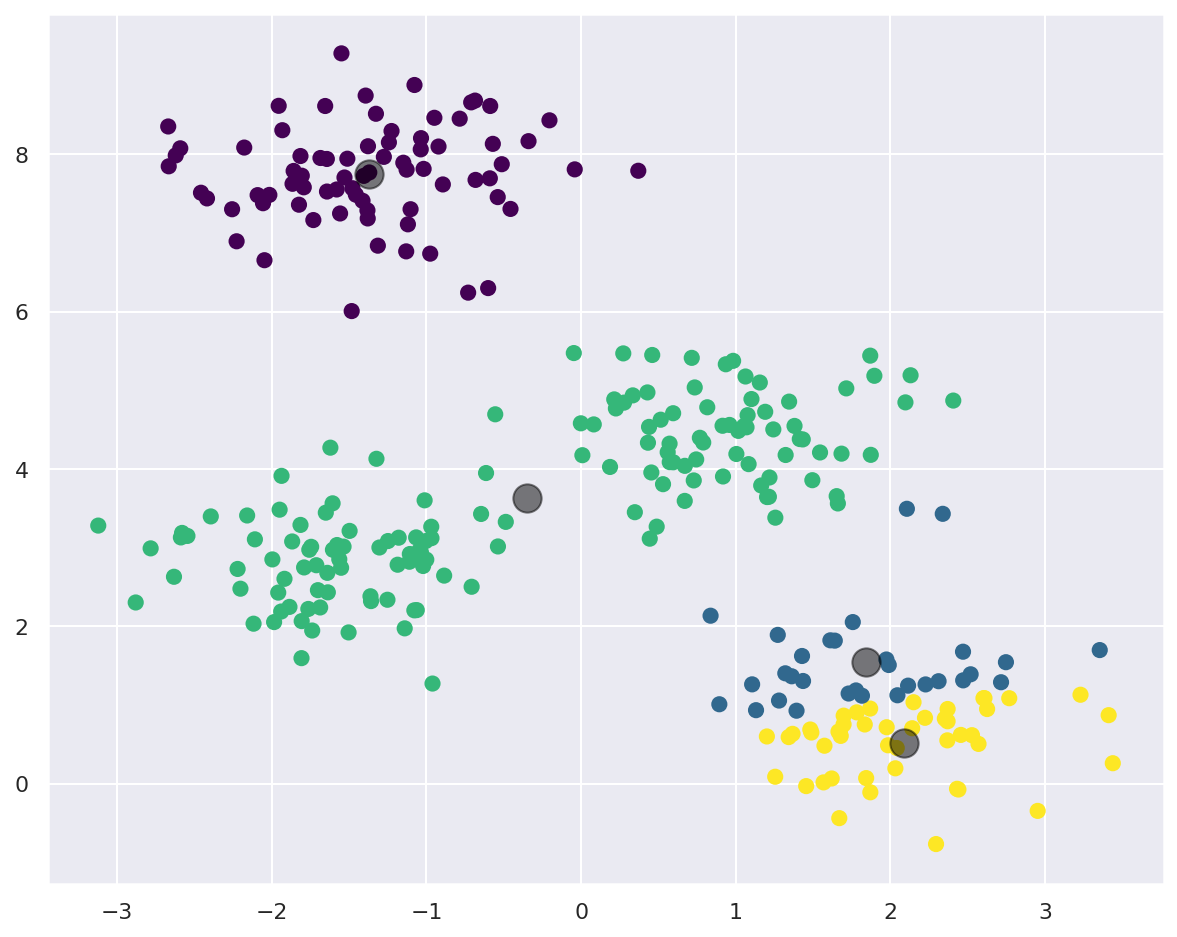

In [4]:
# Apply kmeans
kmeans = KMeans(n_clusters = 4).fit(X)
centers, labels = kmeans.centers_, kmeans.labels_

#plot the labels
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

#plot the centers
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

# Decision Tree Classifier

In [5]:
from pyfit.decision_tree_classifier import DecisionTreeClassifier
from pyfit.metrics import accuracy_score
from sklearn.datasets import load_iris, load_breast_cancer
import pandas as pd

In [6]:
# Load the Iris dataset
iris = load_iris()

# Put it into a DataFrame for visualization purposes
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
# Add target and class columns to DataFrame
df_iris["target"] = iris.target
df_iris["class"] = iris.target_names[iris.target]
# Show 10 random samples
df_iris.sample(n=5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,class
92,5.8,2.6,4.0,1.2,1,versicolor
63,6.1,2.9,4.7,1.4,1,versicolor
142,5.8,2.7,5.1,1.9,2,virginica
79,5.7,2.6,3.5,1.0,1,versicolor
23,5.1,3.3,1.7,0.5,0,setosa


In [7]:
x_train = iris.data
y_train = iris.target

print(f"x_train: {x_train.shape}")
print(f"y_train: {y_train.shape}")

x_train: (150, 4)
y_train: (150,)


In [8]:
# Train a DT on thedataset
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=10)
dt_model.fit(x_train, y_train)

In [9]:
# Compute accuracy on training set
y_pred = [dt_model.predict(x) for x in x_train]
print(y_train)
print(y_pred)
acc = accuracy_score(y_train, y_pred)
print(f"Training accuracy: {acc:.5f}")

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Training accuracy: 0.96667
